In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/vinod/projects/Insurance_prediction/insurance.csv")
df.head(5)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.drop(columns=['index'], axis=1, inplace=True)
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

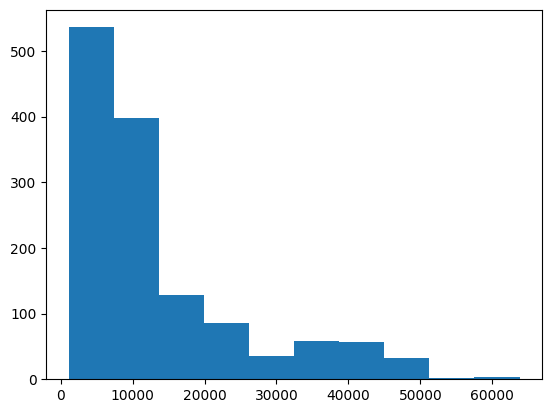

In [8]:
plt.hist(df.charges)

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

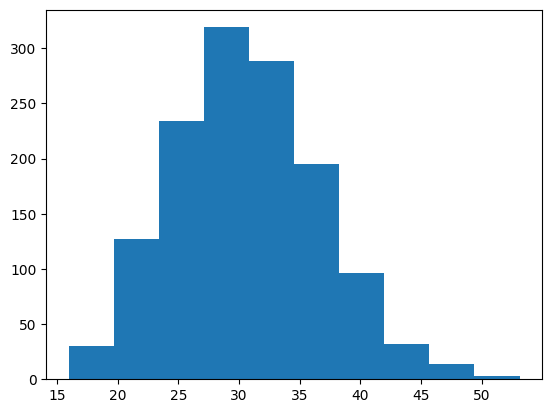

In [9]:
plt.hist(df.bmi)

In [10]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [11]:
df['charges'] = df.charges.astype(int)
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884
1,18,male,33.770,1,no,southeast,1725
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

x=df.drop('charges', axis=1)
y=df.charges

#train test split:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=22, test_size=0.2)
print('x_train shape :', x_train.shape)
print('x_test shape : ', x_test.shape)

x_train shape : (1070, 6)
x_test shape :  (268, 6)


In [13]:
x_train.head(3)

,age,sex,bmi,children,smoker,region
425,45,male,24.31,5,no,southeast
851,61,male,32.30,2,no,northwest
22,18,male,34.10,0,no,southeast


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


encode_cols = ['sex', 'smoker', 'region']


# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse=True), encode_cols)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and test data
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

x_train

/home/vinod/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.  ,  1.  ,  1.  , ..., 45.  , 24.31,  5.  ],
       [ 0.  ,  1.  ,  1.  , ..., 61.  , 32.3 ,  2.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 34.1 ,  0.  ],
       ...,
       [ 0.  ,  1.  ,  1.  , ..., 54.  , 21.01,  2.  ],
       [ 1.  ,  0.  ,  1.  , ..., 53.  , 35.9 ,  2.  ],
       [ 0.  ,  1.  ,  0.  , ..., 32.  , 28.93,  1.  ]])

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('r2_score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))

r2_score :  0.7573018359646491
MSE :  35708406.41292413


In [16]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)
print('r2_score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))

r2_score :  0.6111780057087577
MSE :  57207741.35074627


In [17]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('r2_score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))

r2_score :  0.8144594036671613
MSE :  27298760.36056157


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5,10, 15,20,24,30],
    'min_samples_split': [2, 4, 6,8,10,12,14,16]
}

model=RandomForestRegressor()

gscv = GridSearchCV(estimator= model, param_grid=param_grid, cv=6)

gscv.fit(x_train, y_train)

best_model = gscv.best_estimator_
best_params = gscv.best_params_

print("Best Parameters: ", best_params)
print("Best Model: ", best_model)

Best Parameters:  {'max_depth': 5, 'min_samples_split': 12, 'n_estimators': 300}
Best Model:  RandomForestRegressor(max_depth=5, min_samples_split=12, n_estimators=300)


In [20]:
rfr = RandomForestRegressor(max_depth=5, min_samples_split=12, n_estimators=300)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('r2_score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))

r2_score :  0.8316714282507536
MSE :  24766339.188514177
